In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
from pandas.api.types import is_string_dtype

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
import statsmodels
import statsmodels.api as sm
import pydotplus
from IPython.display import Image  
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [2]:
df_churn=pd.read_csv("Customer churn.csv")
df_churn.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3491,4682-BLBUC,Male,0,Yes,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,No
5536,0778-NELLA,Male,0,No,No,9,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),34.70,296.1,Yes
5887,4316-XCSLJ,Male,0,No,Yes,17,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,846.8,No
1526,2984-AFWNC,Female,0,No,No,3,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,95.40,293.15,No
6353,8735-DCXNF,Male,0,Yes,No,10,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),54.95,568.85,No


In [3]:
df_churn.drop(['customerID', 'SeniorCitizen', 'PaymentMethod',],axis=1,inplace=True)


In [4]:
df_churn.shape

(7043, 18)

In [5]:
df_churn.dtypes

gender               object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
Total = df_churn.isnull().sum().sort_values(ascending = False)          
Percent = (df_churn.isnull().sum()*100/df_churn.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
gender,0,0.0
Partner,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0
DeviceProtection,0,0.0


In [7]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')


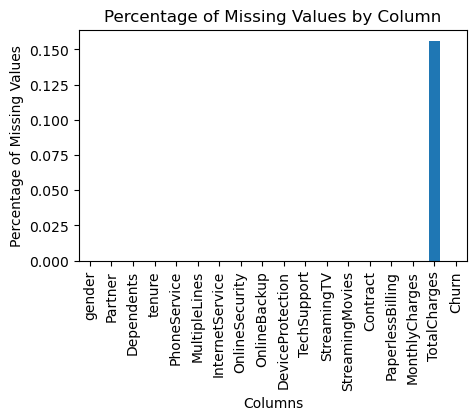

In [8]:
missing_percentage = (df_churn.isnull().sum() / len(df_churn)) * 100

plt.figure(figsize=(5, 3))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
plt.show()

In [9]:
data_no_missing = df_churn.fillna(df_churn.mean(numeric_only=True))


In [10]:
Q1 = df_churn.quantile(0.25)
Q3 = df_churn.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

tenure              46.0000
MonthlyCharges      54.3500
TotalCharges      3393.2875
dtype: float64


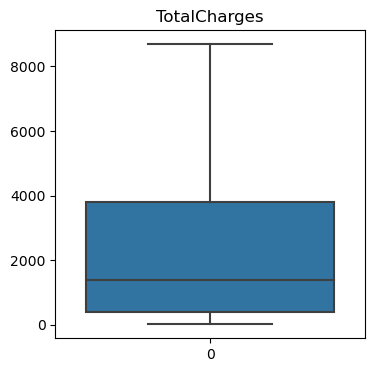

In [11]:
plt.figure(figsize=(4, 4)) 
sns.boxplot(df_churn["TotalCharges"])
plt.title("TotalCharges")
plt.show()

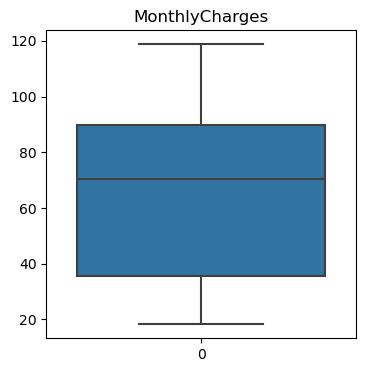

In [12]:
plt.figure(figsize=(4, 4)) 
sns.boxplot(df_churn["MonthlyCharges"])
plt.title("MonthlyCharges")
plt.show()

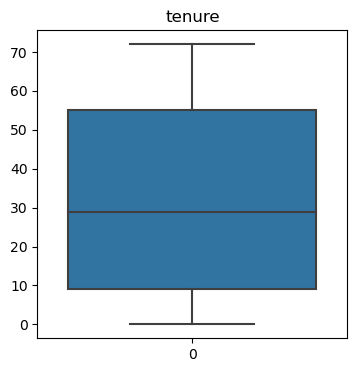

In [13]:
plt.figure(figsize=(4, 4)) 
sns.boxplot(df_churn["tenure"])
plt.title("tenure")
plt.show()

In [14]:
churn = data_no_missing.copy(deep =True )
churn.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,56.95,1889.50,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,53.85,108.15,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes


In [15]:
df_features = churn.iloc[:, churn.columns != 'Churn']
df_target = churn.iloc[:,churn.columns == 'Churn']


In [16]:
df_features.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [17]:
df_features.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171


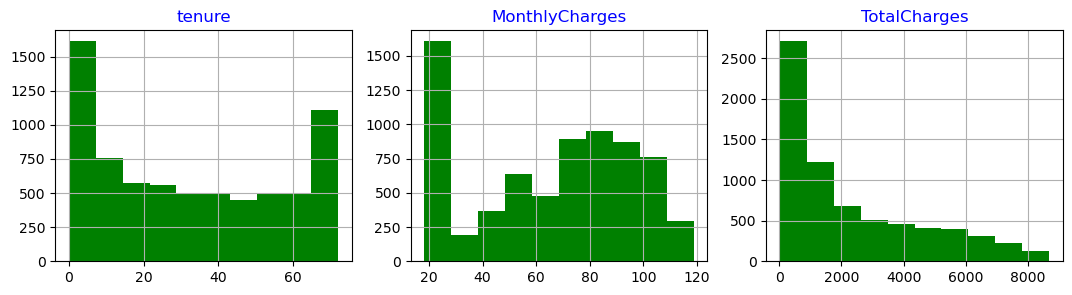

In [18]:
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']  
fig, axes = plt.subplots(1, len(selected_columns), figsize=(13, 3))
axes = axes.flatten()

for i, col in enumerate(selected_columns):
    df_features[col].hist(ax=axes[i],color='green')
    axes[i].set_title(col ,color='blue')

plt.show()


In [19]:
df_target.value_counts()

Churn
No       5174
Yes      1869
dtype: int64

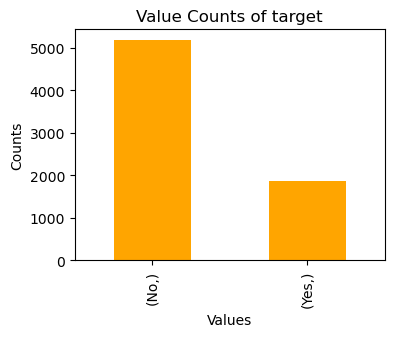

In [20]:
plt.figure(figsize =(4, 3)) 
df_target.value_counts().plot(kind='bar', color='orange')

plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of target')

plt.show()


In [21]:
corr = df_features.corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


<Axes: >

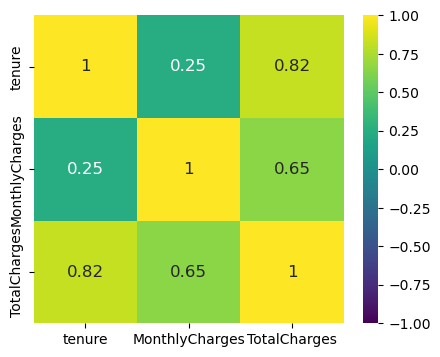

In [22]:
plt.figure(figsize =(5, 4)) 
sns.heatmap(corr, cmap = 'viridis', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12})


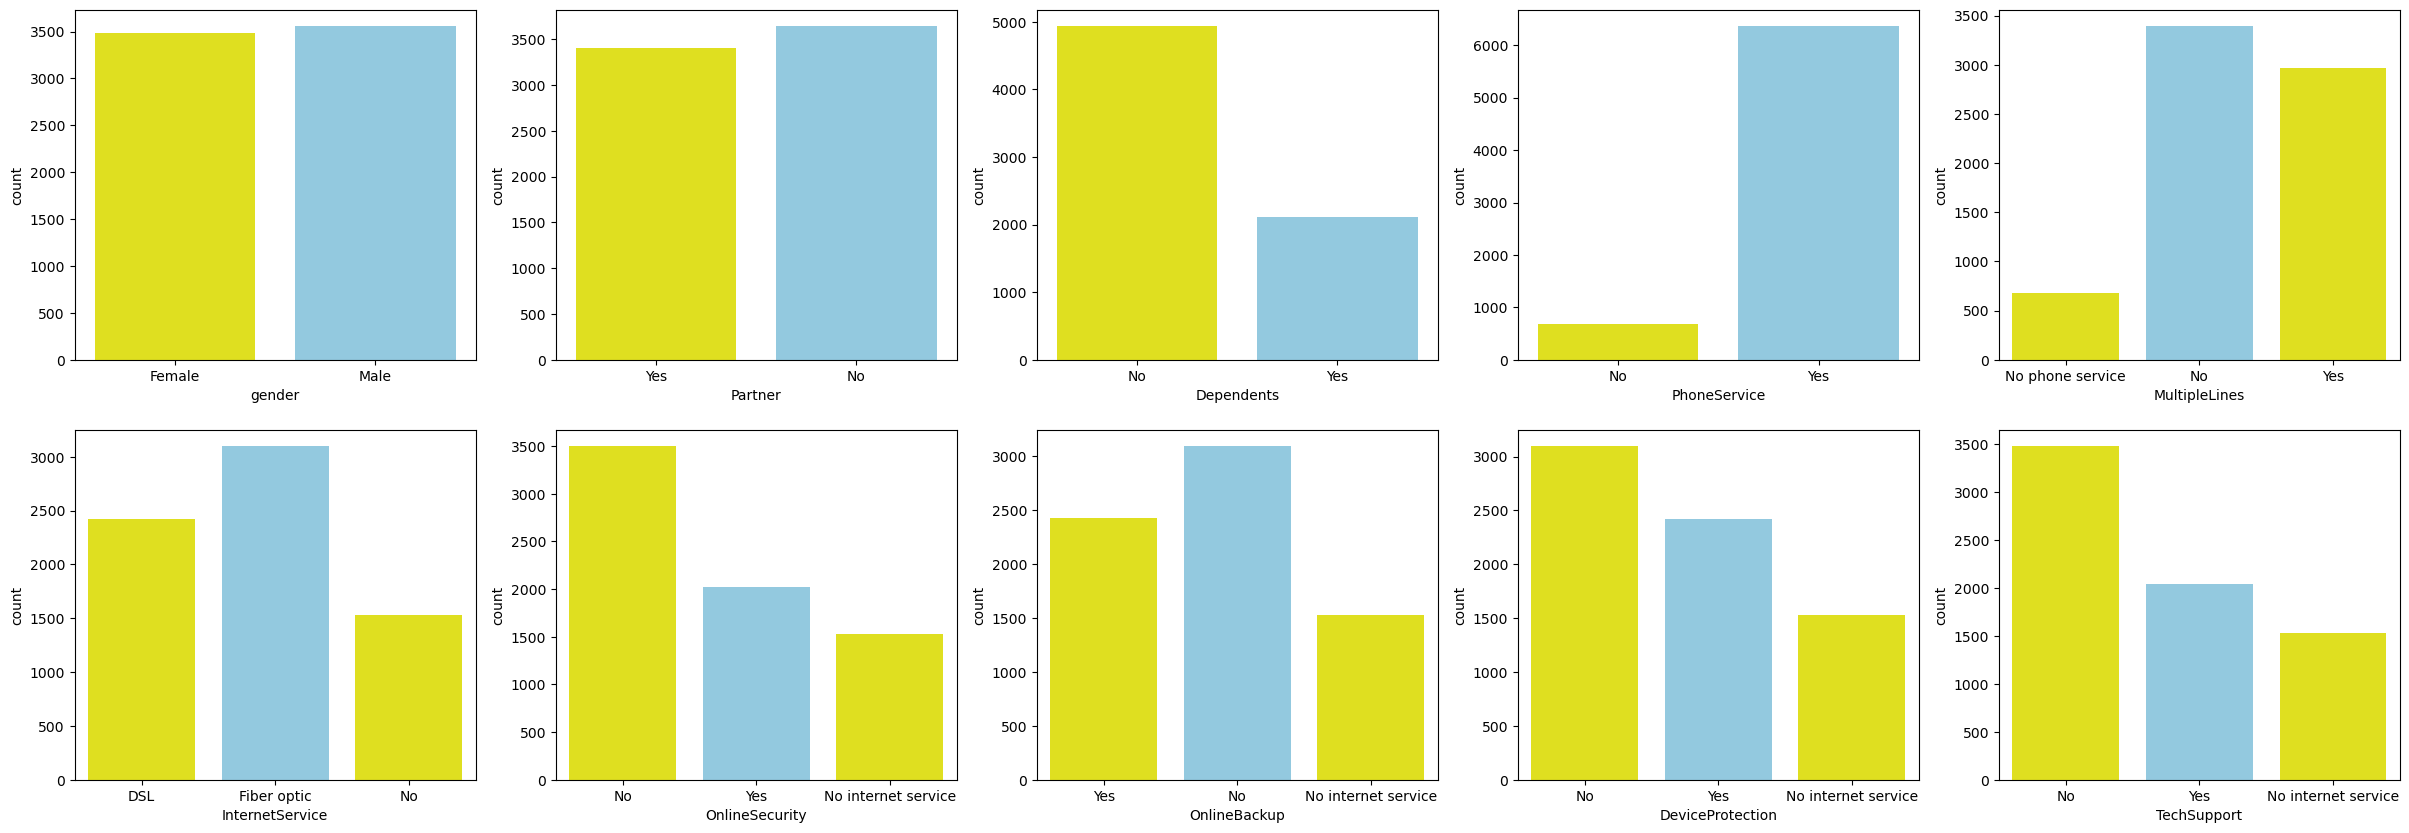

In [23]:
categorical = []
for column in df_features:
    if is_string_dtype(df_features[column]):
        categorical.append(column)

colors = ['yellow', 'skyblue']

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=variable, data=df_features, ax=subplot, palette=colors)

plt.show()

In [24]:
df_cat = churn[categorical]
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes


In [25]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)


In [26]:
df_num = churn.drop(categorical, axis = 1)
df_num

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes
...,...,...,...,...
7038,24,84.80,1990.50,No
7039,72,103.20,7362.90,No
7040,11,29.60,346.45,No
7041,4,74.40,306.60,Yes


In [27]:
standardScaler=StandardScaler()
fit=["tenure","MonthlyCharges","TotalCharges"]
df_num[fit]=standardScaler.fit_transform(df_num[fit])
df_num

,tenure,MonthlyCharges,TotalCharges,Churn
0,-1.277445,-1.160323,-0.994971,No
1,0.066327,-0.259629,-0.173876,No
2,-1.236724,-0.362660,-0.960399,Yes
3,0.514251,-0.746535,-0.195400,No
4,-1.236724,0.197365,-0.941193,Yes
...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,No
7039,1.613701,1.277533,2.242808,No
7040,-0.870241,-1.168632,-0.855182,No
7041,-1.155283,0.320338,-0.872777,Yes


In [28]:
df_dummy = pd.concat([df_num, df_cat_dummies], axis=1)
df_dummy

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,-1.277445,-1.160323,-0.994971,No,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.066327,-0.259629,-0.173876,No,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,-1.236724,-0.362660,-0.960399,Yes,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.514251,-0.746535,-0.195400,No,1,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
4,-1.236724,0.197365,-0.941193,Yes,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,No,1,1,1,1,0,1,...,1,0,1,0,1,0,1,1,0,1
7039,1.613701,1.277533,2.242808,No,0,1,1,1,0,1,...,1,0,0,0,1,0,1,1,0,1
7040,-0.870241,-1.168632,-0.855182,No,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7041,-1.155283,0.320338,-0.872777,Yes,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [29]:
corr = df_dummy.corr()
corr.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
tenure,1.000000,0.247900,0.824757,0.005106,0.379697,0.159712,0.008448,-0.008448,0.331941,0.019720,...,0.360653,-0.039062,0.324221,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152
MonthlyCharges,0.247900,1.000000,0.650468,-0.014569,0.096848,-0.113890,0.247398,-0.247398,0.490434,0.787066,...,0.482692,-0.763557,0.338304,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150
TotalCharges,0.824757,0.650468,1.000000,0.000048,0.318812,0.064535,0.112851,-0.112851,0.468689,0.360547,...,0.522462,-0.374263,0.432480,-0.374263,0.515314,-0.374263,0.519574,0.170491,0.357224,0.157676
gender_Male,0.005106,-0.014569,0.000048,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,-0.011286,...,-0.002105,0.006026,-0.009212,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754
Partner_Yes,0.379697,0.096848,0.318812,-0.001808,1.000000,0.452676,0.017706,-0.017706,0.142057,0.000304,...,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877


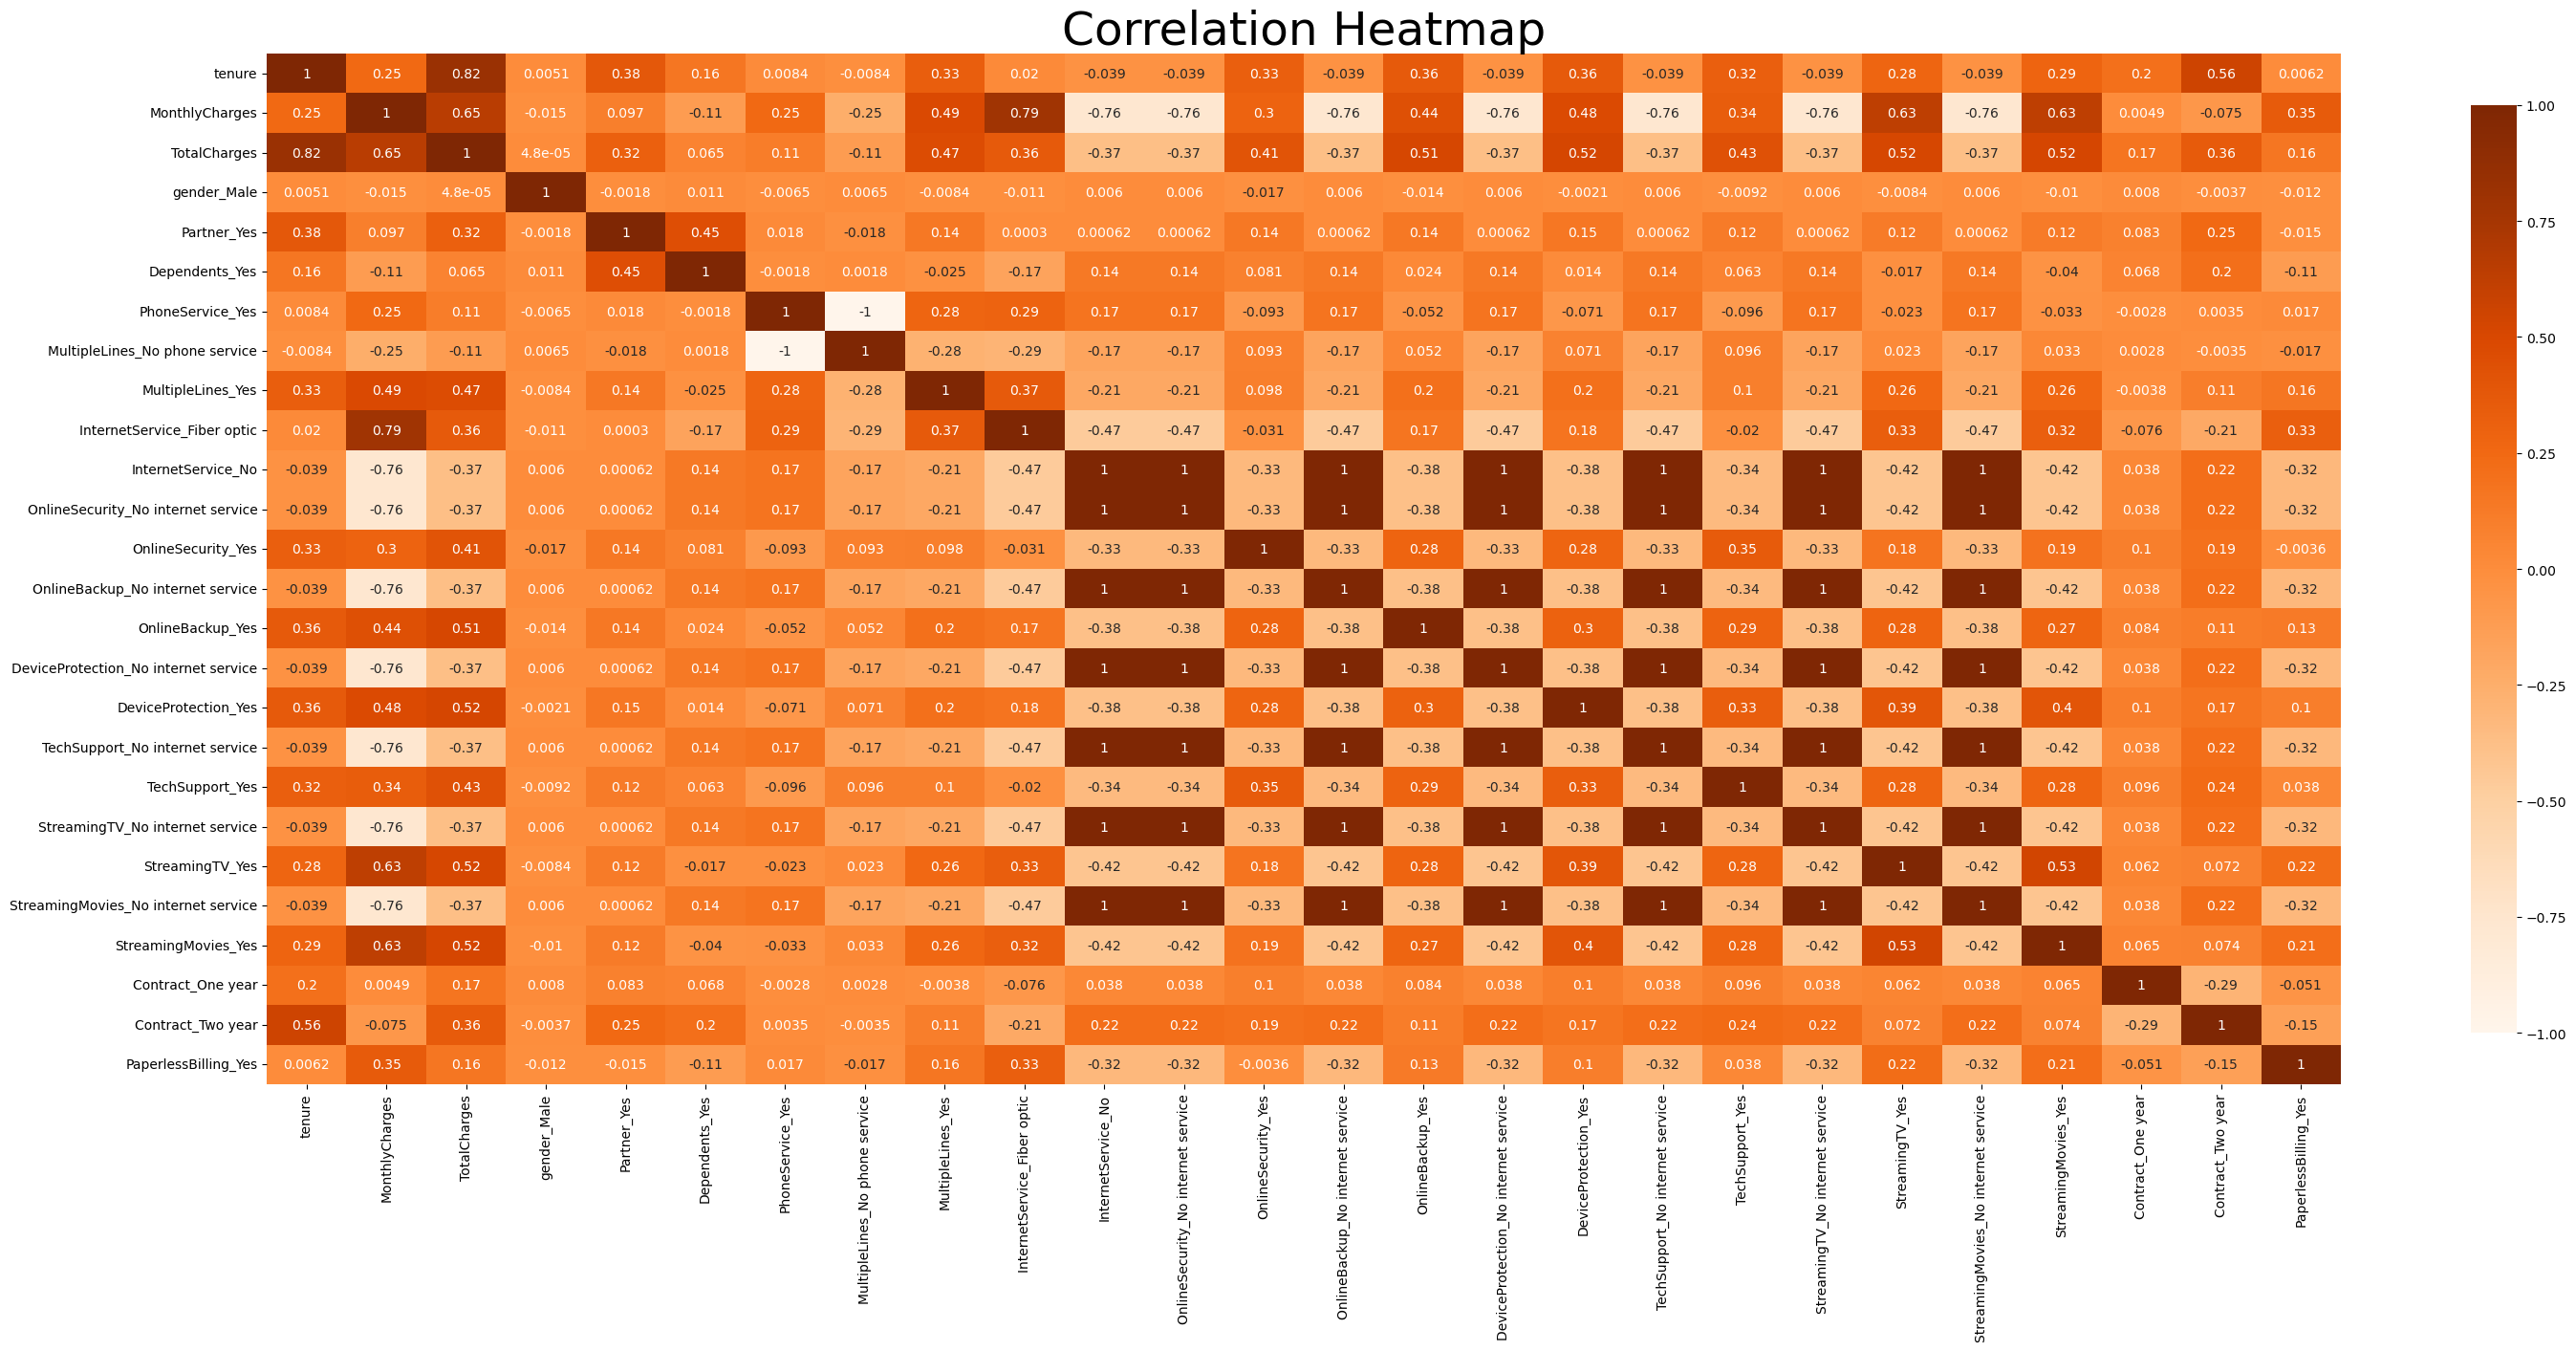

In [30]:
plt.figure(figsize=(35, 14))  

sns.heatmap(corr, cmap='Oranges', vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size": 10}, cbar=True,
            cbar_kws={"shrink": 0.9}) 
plt.title('Correlation Heatmap',fontsize=35)
plt.show()


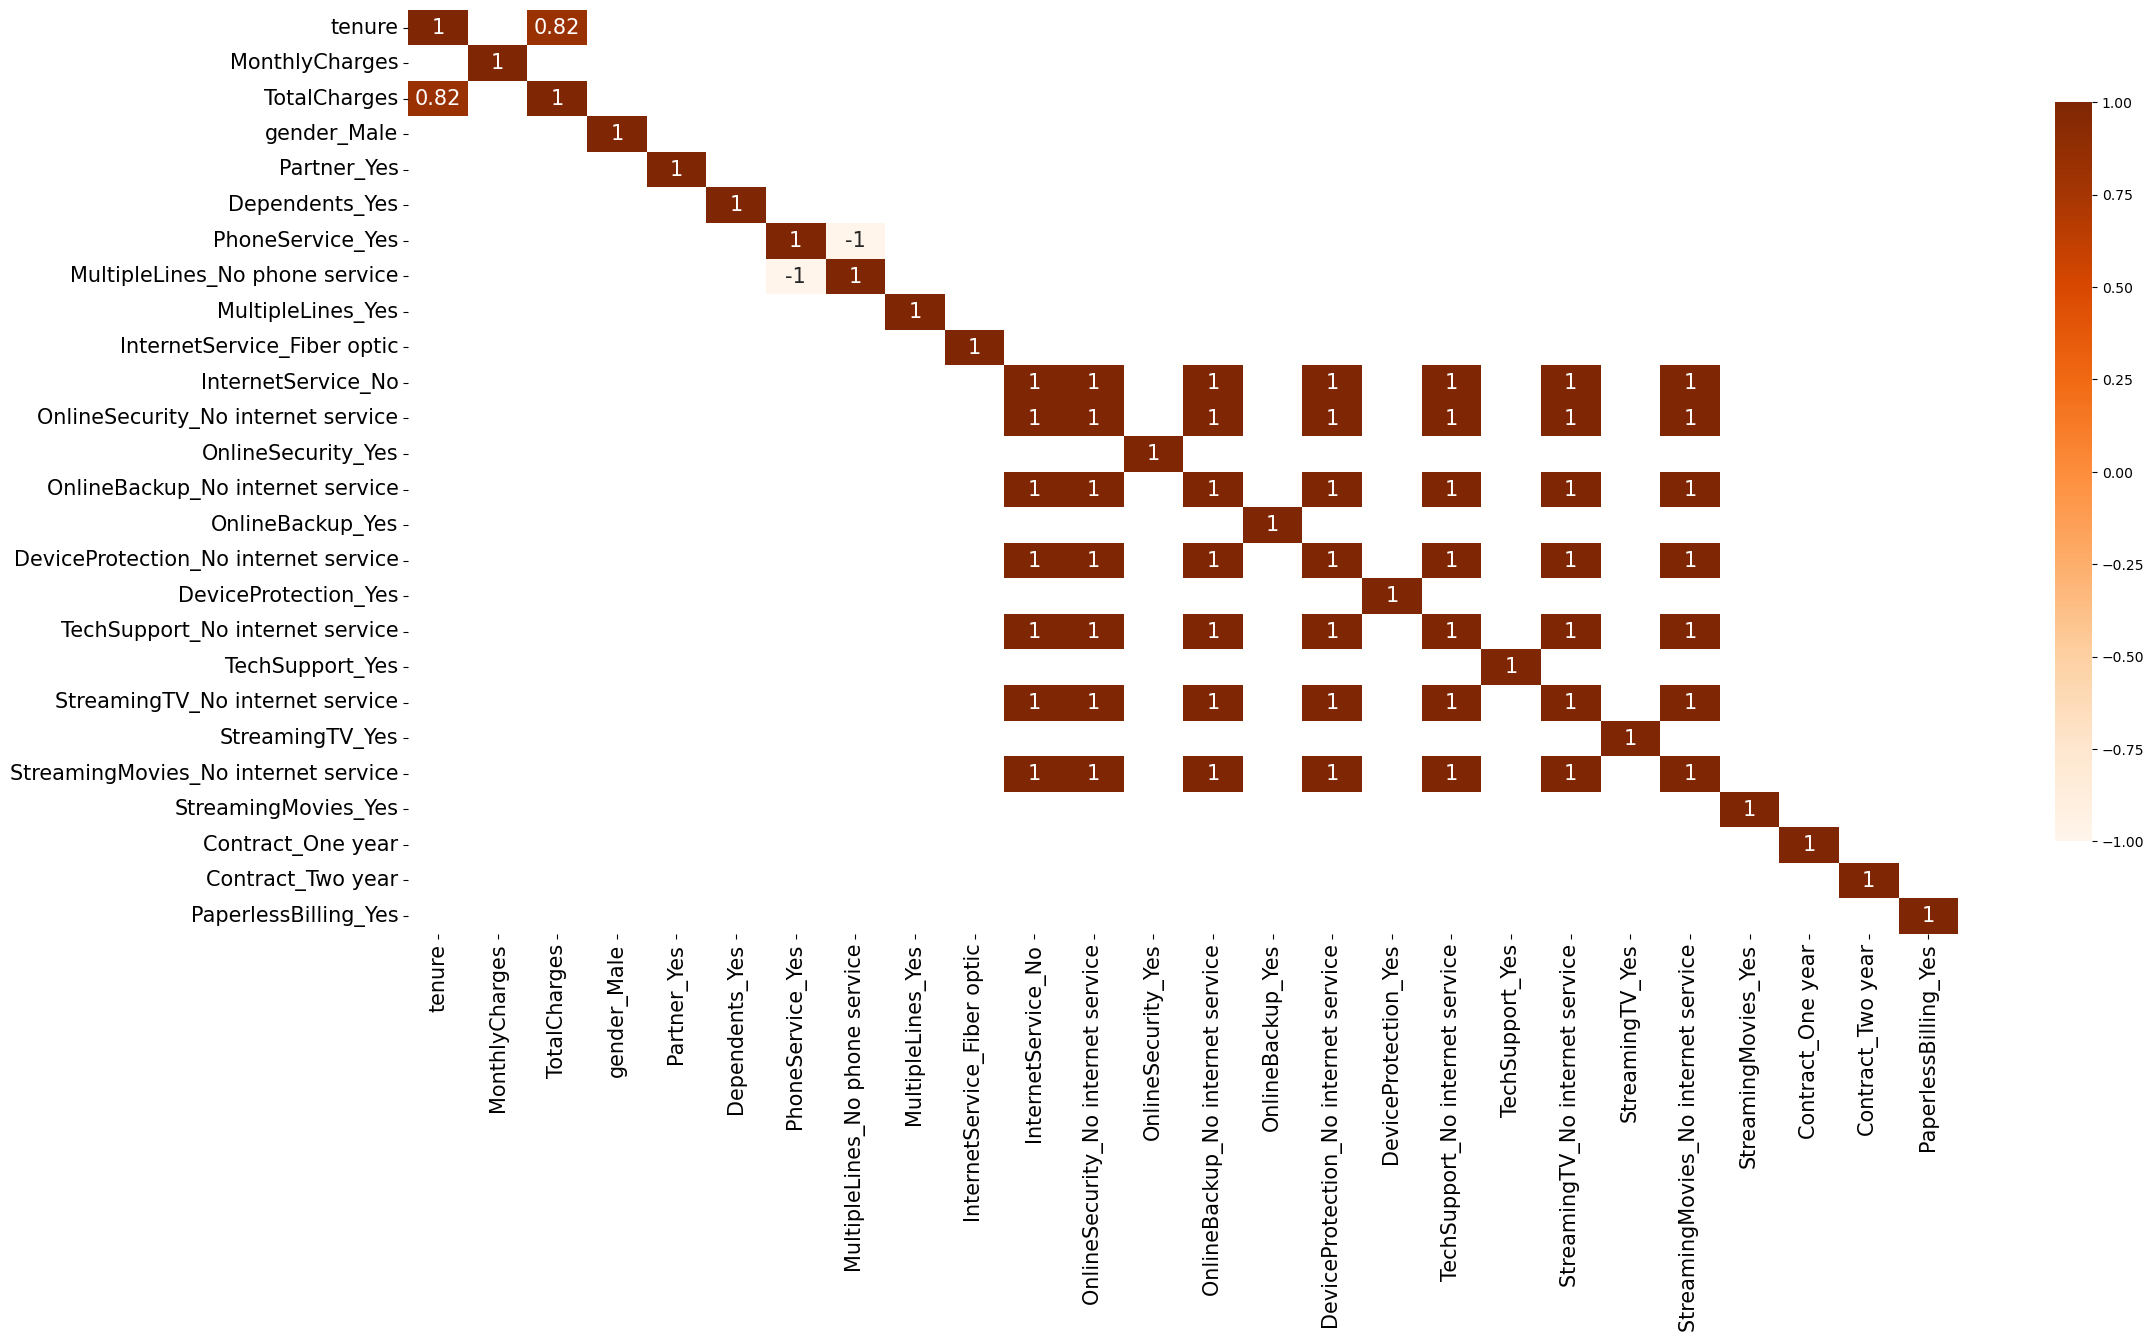

In [31]:
plt.figure(figsize=(25, 12))
sns.heatmap(corr[(corr >= 0.80) | (corr <= -0.80)], cmap = 'Oranges', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 15},cbar_kws={"shrink": 0.8})

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


In [32]:
df_dummy.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes'],
      dtype='object')

In [33]:
df_dummy.drop(["PhoneService_Yes","MultipleLines_No phone service","InternetService_No",
              "OnlineSecurity_No internet service","OnlineBackup_No internet service","DeviceProtection_No internet service",
              "TechSupport_No internet service","StreamingMovies_No internet service"],axis=1,inplace=True)

In [34]:
m = pd.DataFrame(df_dummy['Churn'])
m.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [98]:
y=pd.get_dummies(data=m,columns=['Churn'], drop_first=True)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Churn_Yes  7043 non-null   uint8
dtypes: uint8(1)
memory usage: 7.0 KB


In [36]:
X = df_dummy.drop('Churn',axis = 1)
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,-1.277445,-1.160323,-0.994971,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0.066327,-0.259629,-0.173876,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,-1.236724,-0.362660,-0.960399,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,0.514251,-0.746535,-0.195400,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0
4,-1.236724,0.197365,-0.941193,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [37]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

In [38]:
def kappa_score(model):
    return(cohen_kappa_score(y_test, y_pred))

In [39]:
def plot_confusion_matrix(model, cmap='YlOrBr'):
    cm = confusion_matrix(y_test,y_pred)
    
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],
                            index=['Actual:0','Actual:1'])
    
    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['Lightskyblue']),
               cbar=False,linewidths=0.1,annot_kws={"size":20})
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [40]:
def plot_roc(model):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    plt.plot(fpr, tpr, color='green')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1], 'r--')
    
    plt.title('ROC Curve for churn Classifier', fontsize=15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize=12)
    plt.ylabel('True positive rate (Sensitivity)', fontsize=12)

    auc_score = round(roc_auc_score(y_test, y_pred), 4)
    plt.text(x=0.5, y=0.3, s=f'AUC Score: {auc_score}', fontsize=12, ha='center', va='center', 
             bbox=dict(facecolor='blue', alpha=0.5))

    plt.grid(True)

In [41]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

In [42]:
X = sm.add_constant(X)
X.head()

,const,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,1.0,-1.277445,-1.160323,-0.994971,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1.0,0.066327,-0.259629,-0.173876,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,1.0,-1.236724,-0.362660,-0.960399,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,1.0,0.514251,-0.746535,-0.195400,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0
4,1.0,-1.236724,0.197365,-0.941193,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4930, 19)
(4930, 1)
(2113, 19)
(2113, 1)


In [44]:
log_reg_model = sm.Logit(y_train, X_train).fit()
log_reg_model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\schow\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\schow\anaconda3\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           18
Date:                Sat, 10 Feb 2024   Pseudo R-squ.:                     inf
Time:                        09:47:47   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.1722      0.253     -8.585      0.000      -2.668      -1.676
tenure                             -1.2817      0.172     -7.466      0.000      -1.618      -0.945
MonthlyCharges                     -0.9802      0.232     -4.220      0.000      -1.435      -0.525
TotalCharges                        0.5377      0.184      2.916      0.004       0.176       0.899
gender_Male                        -0.0382      0.078     -0.490      0.624      -0.191       0.115
Partner_Yes                         0.0760      0.093      0.821      0.412      -0.106       0.258
Dependents_Yes                     -0.2975      0.105     -2.822      0.005      -0.504      -0.091
MultipleLines_Yes                   0.4928      0.109      4.537      0.000       0.280       0.706
InternetService_Fiber optic         1.6867      0.257      6.574      0.000       1.184       2.190
OnlineSecurity_Yes                 -0.1587      0.109     -1.450      0.147      -0.373       0.056
OnlineBackup_Yes                   -0.0972      0.099     -0.987      0.324      -0.290       0.096
DeviceProtection_Yes                0.1059      0.101      1.047      0.295      -0.092       0.304
TechSupport_Yes                    -0.3901      0.112     -3.498      0.000      -0.609      -0.172
StreamingTV_No internet service    -1.8092      0.212     -8.517      0.000      -2.226      -1.393
StreamingTV_Yes                     0.5541      0.120      4.610      0.000       0.319       0.790
StreamingMovies_Yes                 0.5207      0.119      4.394      0.000       0.288       0.753
Contract_One year                  -0.7501      0.128     -5.845      0.000      -1.002      -0.499
Contract_Two year                  -1.4601      0.206     -7.090      0.000      -1.864      -1.056
PaperlessBilling_Yes                0.3755      0.090      4.195      0.000       0.200       0.551
===================================================================================================
"""

In [45]:
y_pred_prob = log_reg_model.predict(X_test)
y_pred_prob.head()

4880    0.005641
1541    0.001858
1289    0.013334
5745    0.005673
4873    0.156572
dtype: float64

In [46]:
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]


In [47]:
y_pred = np.array(y_pred, dtype=np.float32)
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

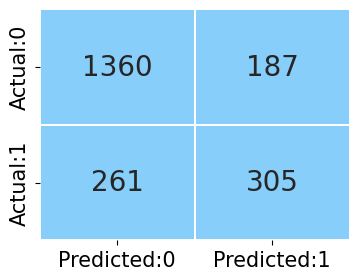

In [48]:
plt.figure(figsize=(4, 3))
plot_confusion_matrix(log_reg_model)

In [49]:
test_report=get_test_report(log_reg_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1547
           1       0.62      0.54      0.58       566

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



In [50]:
kappa_value= kappa_score(log_reg_model)
print(kappa_value)

0.43606674570031156


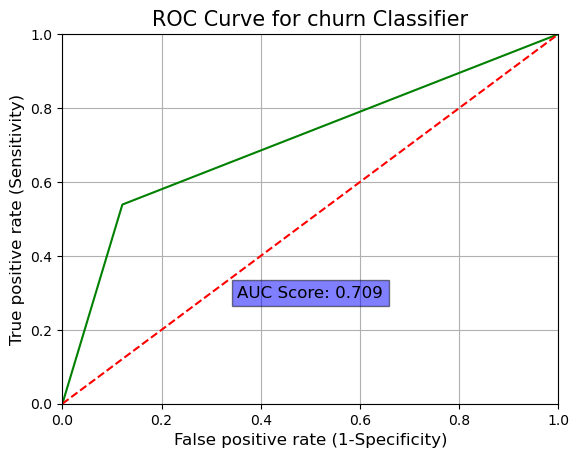

In [51]:
kappa_value= kappa_score(log_reg_model)
print(kappa_value)

In [52]:
update_score_card(model_name= 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.708995,0.619919,0.538869,0.787979,0.436067,0.57656


In [53]:
SGD = SGDClassifier(loss = 'log_loss', random_state = 10)

logreg_with_SGD = SGD.fit(X_train, y_train)

In [54]:
y_pred_prob = logreg_with_SGD.predict(X_test)
y_pred_prob

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

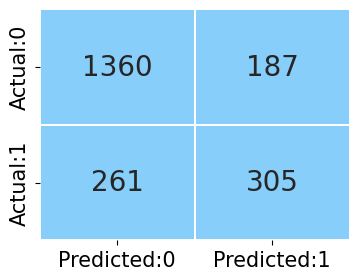

In [55]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(4, 3))
plot_confusion_matrix(logreg_with_SGD)

In [56]:
kappa_value= kappa_score(logreg_with_SGD)
print(kappa_value)

0.43606674570031156


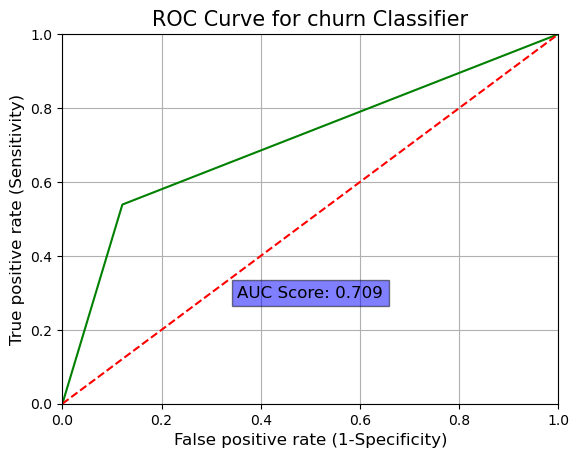

In [57]:
plot_roc(logreg_with_SGD)

In [58]:
update_score_card(model_name= 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.708995,0.619919,0.538869,0.787979,0.436067,0.57656
1,Logistic Regression (SGD),0.708995,0.619919,0.538869,0.787979,0.436067,0.57656


In [59]:

rf_reg = RandomForestClassifier(n_estimators=100, random_state=10)
rf_reg.fit(X_train, y_train)


RandomForestClassifier(random_state=10)

In [60]:
y_pred = rf_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

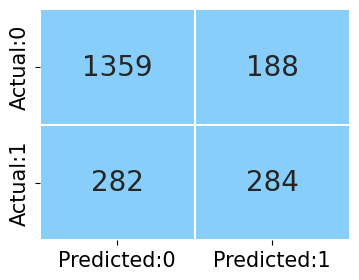

In [61]:
plt.figure(figsize=(4, 3))
plot_confusion_matrix(rf_reg)

In [62]:
test_report=get_test_report(rf_reg)
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1547
           1       0.60      0.50      0.55       566

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [63]:
kappa_value= kappa_score(rf_reg)
print(kappa_value)

0.401376741270291


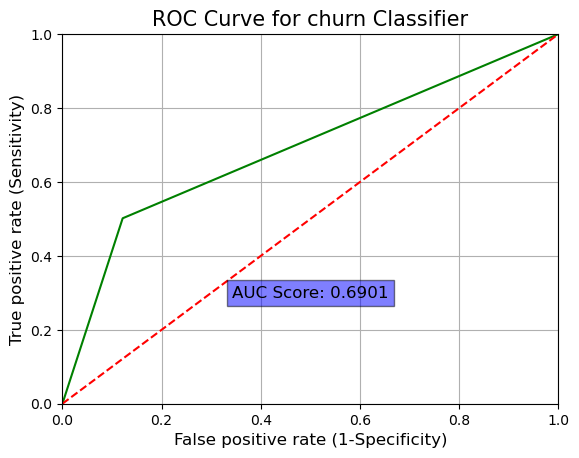

In [64]:
plot_roc(rf_reg)

In [65]:
update_score_card(model_name= 'Random Forest')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
1,Logistic Regression (SGD),0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
2,Random Forest,0.690121,0.601695,0.501767,0.777567,0.401377,0.547206


In [66]:
tuned_paramaters = [{'n_estimators': [70, 85, 100],
                     'min_samples_split': [15, 20,25],
                     'max_depth': [6,8, 10],
                     'min_samples_leaf': [5,10],
                     'max_leaf_nodes': [10, 15]
                    }]

In [67]:
from sklearn.model_selection import GridSearchCV

rf_reg_CV= RandomForestClassifier(random_state = 10)

grid = GridSearchCV(estimator = rf_reg_CV, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', dt_grid.best_params_, '\n')

Best parameters for random forest classifier:  {'max_depth': 6, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 70} 



In [68]:
dt_grid_model = RandomForestClassifier(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)


dt_grid_model = dt_grid_model.fit(X_train, y_train)

In [69]:
y_pred = dt_grid_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

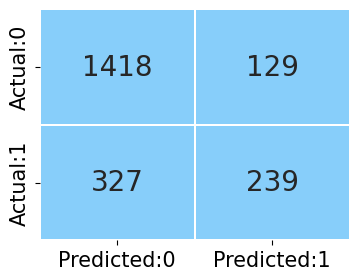

In [70]:
plt.figure(figsize=(4, 3))
plot_confusion_matrix(dt_grid_model)

In [71]:
test_report=get_test_report(dt_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1547
           1       0.65      0.42      0.51       566

    accuracy                           0.78      2113
   macro avg       0.73      0.67      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [72]:
kappa_value= kappa_score(dt_grid_model)
print(kappa_value)

0.3811502627546137


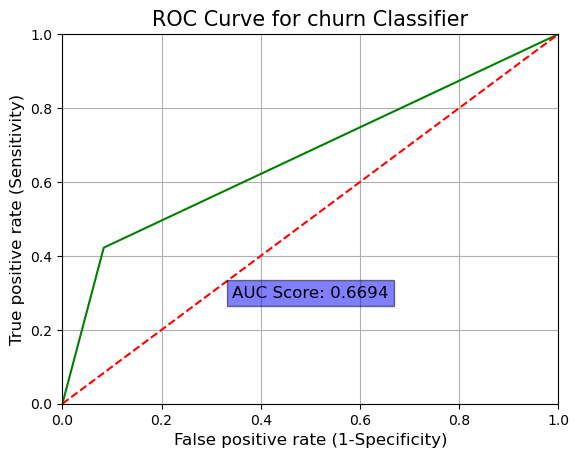

In [73]:
plot_roc(dt_grid_model)

In [74]:
update_score_card(model_name= 'Random Forest (Tunned)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
1,Logistic Regression (SGD),0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
2,Random Forest,0.690121,0.601695,0.501767,0.777567,0.401377,0.547206
3,Random Forest (Tunned),0.669437,0.649457,0.422261,0.784193,0.381150,0.511777


In [75]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree_model = decision_tree.fit(X_train, y_train)

In [76]:
y_pred = decision_tree_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)

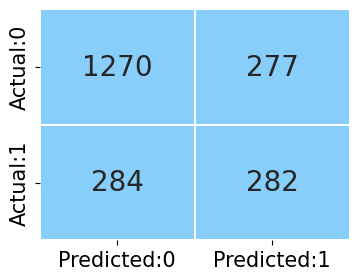

In [77]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(4, 3)) 
plot_confusion_matrix(decision_tree_model)


In [78]:
test_report = get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1547
           1       0.50      0.50      0.50       566

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [79]:
kappa_value = kappa_score(decision_tree_model)
print(kappa_value)

0.3204334942158539


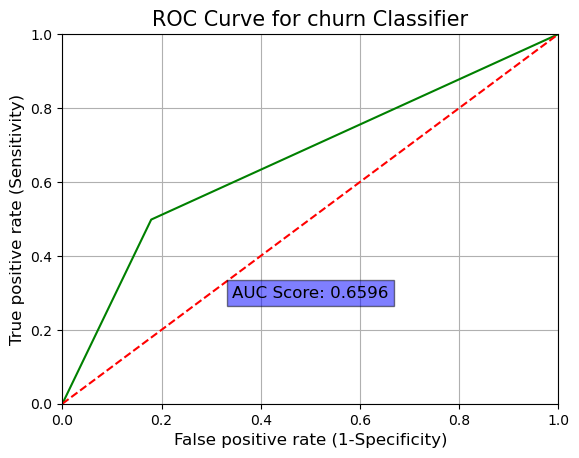

In [80]:
plot_roc(decision_tree_model)


In [81]:
update_score_card(model_name = 'Decision Tree (ENTROPY)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
1,Logistic Regression (SGD),0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
2,Random Forest,0.690121,0.601695,0.501767,0.777567,0.401377,0.547206
3,Random Forest (Tunned),0.669437,0.649457,0.422261,0.784193,0.381150,0.511777
4,Decision Tree (ENTROPY),0.659588,0.504472,0.498233,0.734501,0.320433,0.501333


In [82]:
decision_tree = DecisionTreeClassifier(criterion = "gini", random_state = 20)

decision_tree_model = decision_tree.fit(X_train, y_train)

In [83]:
y_pred = decision_tree_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)

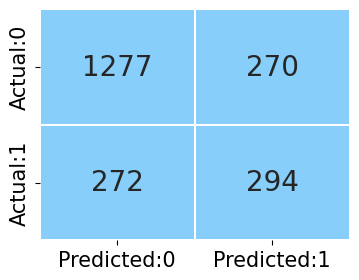

In [84]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(4, 3)) 
plot_confusion_matrix(decision_tree_model)


In [85]:
test_report = get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1547
           1       0.52      0.52      0.52       566

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113



In [86]:
kappa_value = kappa_score(decision_tree_model)
print(kappa_value)

0.34529013138262177


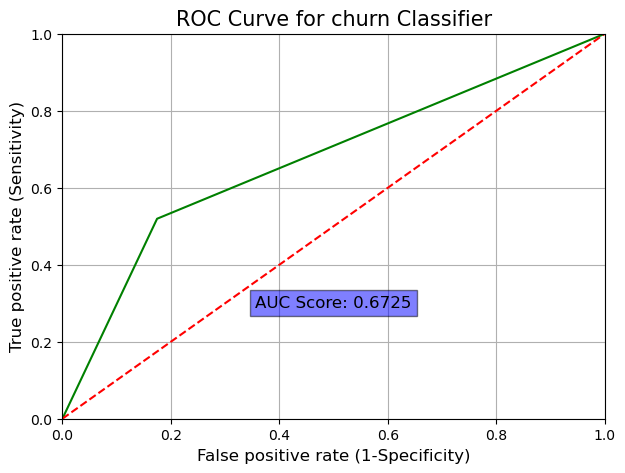

In [87]:
plt.figure(figsize=(7, 5))
plot_roc(decision_tree_model)

In [88]:
update_score_card(model_name = 'Decision Tree (GINI)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
1,Logistic Regression (SGD),0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
2,Random Forest,0.690121,0.601695,0.501767,0.777567,0.401377,0.547206
3,Random Forest (Tunned),0.669437,0.649457,0.422261,0.784193,0.381150,0.511777
4,Decision Tree (ENTROPY),0.659588,0.504472,0.498233,0.734501,0.320433,0.501333
5,Decision Tree (GINI),0.672452,0.521277,0.519435,0.743493,0.345290,0.520354


In [89]:
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7],
                     'min_samples_leaf': [15, 20, 25, 30],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [90]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
grid = GridSearchCV(estimator = decision_tree_classification, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 20, 'min_samples_leaf': 30, 'min_samples_split': 10} 



In [91]:
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

dt_grid_model = dt_grid_model.fit(X_train, y_train)

In [92]:
y_pred = dt_grid_model.predict(X_test)

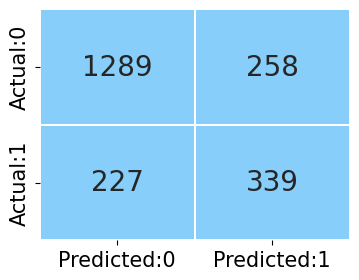

In [93]:
plt.figure(figsize=(4, 3)) 
plot_confusion_matrix(dt_grid_model)

In [94]:
test_report = get_test_report(dt_grid_model)

print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1547
           1       0.57      0.60      0.58       566

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.71      2113
weighted avg       0.77      0.77      0.77      2113



In [95]:
kappa_value = kappa_score(dt_grid_model)

print(kappa_value)

0.42478874504312103


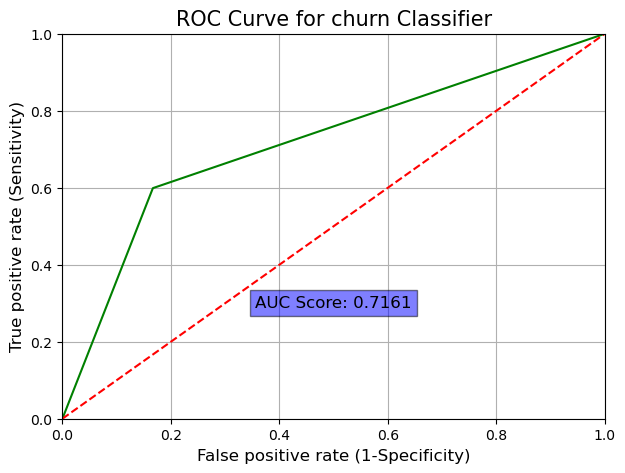

In [96]:
plt.figure(figsize=(7, 5))
plot_roc(dt_grid_model)

In [97]:
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
1,Logistic Regression (SGD),0.708995,0.619919,0.538869,0.787979,0.436067,0.576560
2,Random Forest,0.690121,0.601695,0.501767,0.777567,0.401377,0.547206
3,Random Forest (Tunned),0.669437,0.649457,0.422261,0.784193,0.381150,0.511777
4,Decision Tree (ENTROPY),0.659588,0.504472,0.498233,0.734501,0.320433,0.501333
5,Decision Tree (GINI),0.672452,0.521277,0.519435,0.743493,0.345290,0.520354
6,Decision Tree (GridSearchCV),0.716083,0.567839,0.598940,0.770469,0.424789,0.582975
